In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [7]:
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [8]:
test

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


- Note: test does not contain label_group. test only has 3 instances (and images)

In [28]:
def print_details(df):
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
    print(f"There are a total of {len(np.unique(df['posting_id']))} unique posting")
    print(f"There are a total of {len(np.unique(df['image']))} unique images")
    if 'label_group' in df.columns:
        print(f"There are a total of {len(np.unique(df['label_group']))} unique label groups\n")

In [29]:
print_details(train)

print_details(test)

There are 34250 rows and 5 columns.
There are a total of 34250 unique posting
There are a total of 32412 unique images
There are a total of 11014 unique label groups

There are 3 rows and 4 columns.
There are a total of 3 unique posting
There are a total of 3 unique images


In [48]:
label_group_counts = train.groupby('label_group').size().reset_index(name='count').sort_values(by='count', ascending= False).head(20)
label_group_counts

,label_group,count
3041,1163569239,51
412,159351600,51
2606,994676122,51
8037,3113678103,51
9370,3627744656,51
2994,1141798720,51
1445,562358068,51
8297,3206118280,49
4438,1733221456,46
3047,1166650192,46


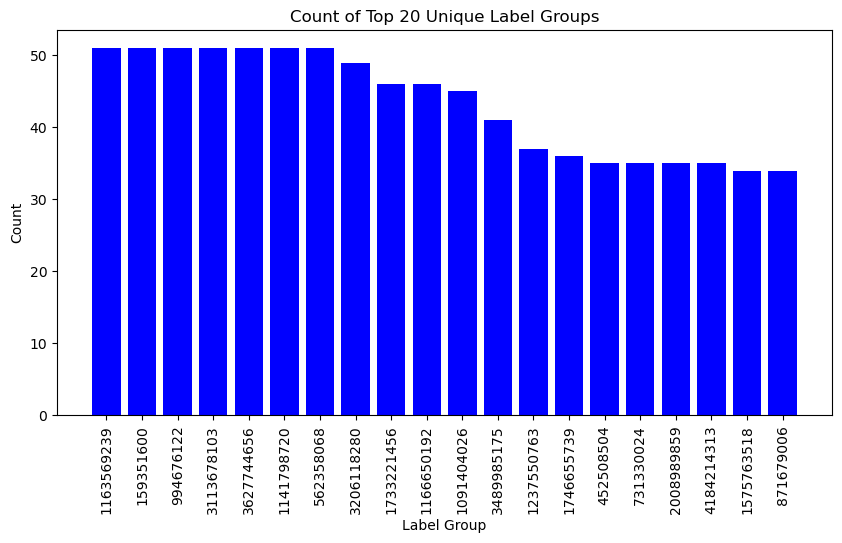

In [55]:
plt.figure(figsize=(10, 5))
plt.bar(label_group_counts['label_group'].astype(str), label_group_counts['count'], color='blue')
plt.xlabel('Label Group')
plt.ylabel('Count')
plt.title('Count of Top 20 Unique Label Groups')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [54]:
image_phash_counts = train.groupby('image_phash').size().reset_index(name='count').sort_values(by='count', ascending= False).head(20)
image_phash_counts

,image_phash,count
27584,fad28daa2ad05595,26
16476,d0c0ea37bd9acce0,20
12714,be12e12f9ec1e198,17
21189,e992966d4ba49761,16
26257,f6d98134b904b56b,16
10663,ba96cc48cc63c56b,14
18092,def6e14b4a398885,13
400,84563f696135c79a,13
16128,ce2fa4d3959a51b0,12
10937,bb13e24edd48d02e,12


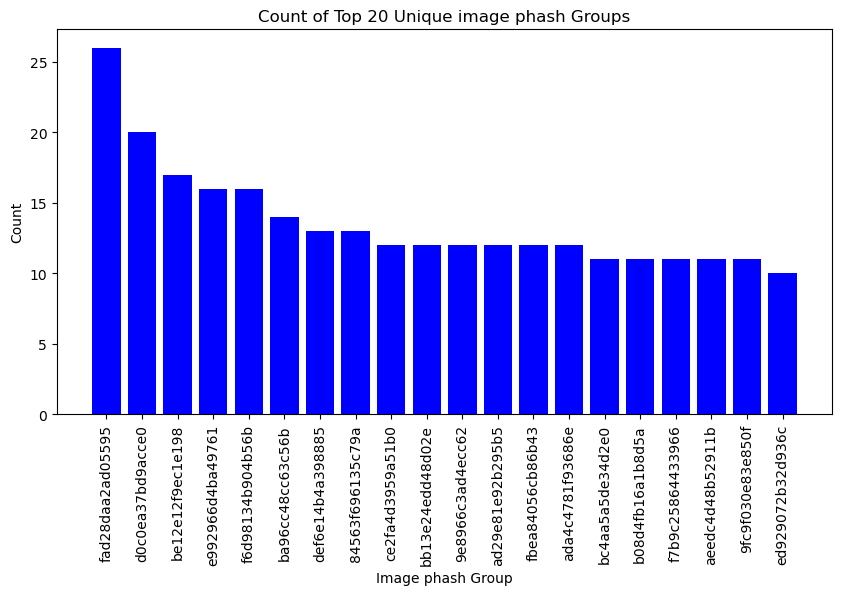

In [56]:
plt.figure(figsize=(10, 5))
plt.bar(image_phash_counts['image_phash'].astype(str), image_phash_counts['count'], color='blue')
plt.xlabel('Image phash Group')
plt.ylabel('Count')
plt.title('Count of Top 20 Unique image phash Groups')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
